# Tank drainage problem

Consider a tank with cross-sectional area $A$ that is initially filled with water to a level $h_0$.  Water enters the tank at a mass flow rate $\dot{m}_{\rm in}(t)$, which may depend on time.   Water exit the tank with volumetric flow rate given by
\begin{align*}
\dot{V} =  K \rho g h(t)
\end{align*}
where $h(t)$ is the height of the water in the tank,
$K$ is a valve constant, $g=9.81\,{m\,s^{-2}}$ is the gravitational acceleration, and $\rho$ is the density of water.

From a mass balance on the water in the tank, we can derive the following differential equation:
\begin{align*}
\frac{dh(t)}{dt}
&=
\frac{\dot{m}_{\rm in}(t)}{\rho A}
- \frac{K \rho g h(t)}{A}
\end{align*}

The standard form for a first order linear differential equation is
\begin{align*}
\frac{dy(x)}{dx}
+ a(x) y(x)
&=
f(x)
\end{align*}
where $a(x)$ and $f(x)$ are known functions.

Comparing the differential equatiion derived from the mass balance to the standard form of a first order linear differential equation, we can make the identifications:
\begin{align*}
x &\leftrightarrow t
\\
y(x) &\leftrightarrow h(t)
\\
a(x) &\leftrightarrow \frac{K\rho g}{A}
\\
f(x) &\leftrightarrow \frac{\dot{m}_{\rm in}}{\rho A}
\end{align*}

In the following, we will look at solving the equations analytically with the help of the `Sympy` libraries and numerically with the Euler method.



## Analytical solution

In class, we have shown that the general solution to a linear first order differential equation can be written as:
\begin{align*}
y(x)
&=
e^{-A(x)} \int dx\,e^{A(x)}f(x)
+ C\,e^{-A(x)}
\end{align*}
where $C$ is an unknown constant that can be determined from an initial condition.

We can implement this solution by hand, or we can try to get Python to do this for us through use of the `Sympy` library.



In [ ]:
import sympy as sp

K = 1.0
rho = 1000
g = 9.81
A = 0.1
dotm_in = 1


x = sp.symbols('x')
a_func = K*rho*g/A             # this is a(x)
f_func = dotm_in / (rho*A)     # this is f(x)


# Everything below here is general, and does not depend on the particular form
# of the functions a(x) and f(x).
const = sp.symbols('const')
A_func = sp.integrate(a_func, x)
print('A(x) = ', A_func)


I = sp.exp(A_func)  # this is our integrating factor
print('integrating factor: exp(A(x))= ', I  )
y = sp.exp(-A_func) * sp.integrate(sp.exp(A_func)*f_func, x) + const*sp.exp(-A_func)
print('y=',y)




A(x) =  9.81*x
integrating factor: exp(A(x))=  exp(9.81*x)
y= const*exp(-9.81*x) + 0.00101936799184506


Note that we still have to determine the unknown constant, but we can find that from the initial condition.

## Euler method

Now we examine how to solve the previous differential equation numerically using the Euler method.  This method is based on approximating the derivative with a forward difference:
\begin{align*}
\frac{dy(x)}{dx}
&\approx
\frac{y(x+\Delta x) - y(x)}{\Delta x}
.
\end{align*}
This expression is exact in the limit that $\Delta x\to0$, but it is only approximate for a finite value of $\Delta x$; however, the smaller the value of $\Delta x$, the more accurate it will be.

Substituting this expression in to the differential equation, we find
\begin{align*}
\frac{dy(x)}{dx}
+ a(x) y(x)
&=
f(x)
\\
\frac{dy(x)}{dx}
&=
- a(x) y(x)
+ f(x)
\\
\frac{y(x+\Delta x) - y(x)}{\Delta x}
&\approx
- a(x) y(x)
+ f(x)
\end{align*}

This can be rearranged to give the final formula:
\begin{align*}
y(x+\Delta x)
&=
y(x) + [-a(x) y(x) + f(x)] \Delta x
\end{align*}

This expression allows us to determine the value of the function $y(x+\Delta x)$ from knowledge of the system at time $x$.  As an example, if we know that $y(0)=1$ at time $x=0$, then we can use the Euler method to determine the value of $y(\Delta x)$ at time $x=\Delta x$.


In [ ]:
K = 1.0e-4
rho = 1000
g = 9.81
A = 0.1
dotm_in = 1



y_old = 1.0  # initial value of y (i.e. y(0))
x_old = 0.0  # initial value of time  (i.e. x=0)
dx = 0.01    # step size

a = K*rho*g/A         # this is a(x)
f = dotm_in/(rho*A)   # this is f(x)
x = x_old + dx
y = y_old + (- a*y_old + f)*dx
print(x, y)

y_old = y
x_old = x




0.01 0.902


We can repeat this process to determine how the height of water in the tank varies with time in general.

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.5500000000000003, 0.5600000000000003, 0.

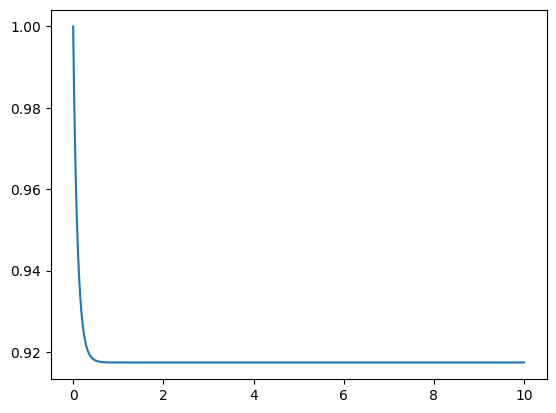

In [1]:
import numpy as np

K = 1.0e-4
rho = 1000
g = 9.81
A = 0.1
dotm_in = 900

y_old = 1.0
x_old = 0.0
T_old = 298
dx = 0.01
x_list= [x_old]
y_list = [y_old]
for step in range(1000):
  a = K*rho*g/A
  f = dotm_in/(rho*A)
  x = x_old + dx
  y = y_old + (- a*y_old + f)*dx
  x_list.append(x)
  y_list.append(y)
#  print(x, y)

  y_old = y
  x_old = x

print(x_list)
print(y_list)

import matplotlib.pyplot as plt
plt.plot(x_list,y_list)
plt.show()

The advantage of performing the numerical solution on Python is that we can examine more complex equations fairly easily.  For example, the code below is for a system with a time dependent inlet mass flow rate given by
\begin{align*}
\dot{m}_{\rm in}(t)
&=
\dot{m}_0 (1-\cos t)
\end{align*}
This corresponds to the inlet flow being turned up and down in a sinusoidal manner.

In addition, we can also look at more complicated expressions for the drainage of the tank with the height of water in the tank (e.g., $\dot{V}\propto[2\rho g h(t)]^{1/2}$).



[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.5500000000000003, 0.5600000000000003, 0.

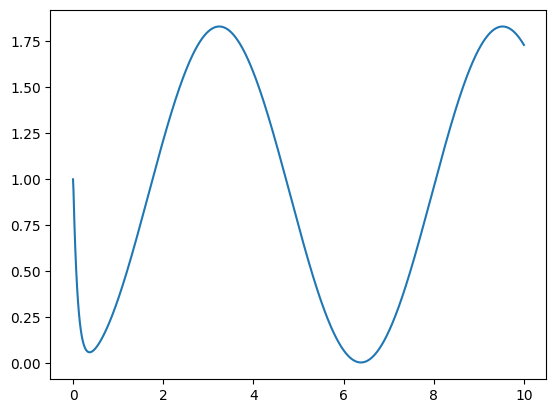

In [4]:
import numpy as np

K = 1.0e-4
rho = 1000
g = 9.81
A = 0.1
dotm_in = 900

y_old = 1.0
x_old = 0.0
T_old = 298
dx = 0.01
x_list= [x_old]
y_list = [y_old]
for step in range(1000):
  a = K*rho*g/A
  f = dotm_in*(1.0-np.cos(x))/(rho*A)
  x = x_old + dx
  y = y_old + (- a*y_old + f)*dx
  x_list.append(x)
  y_list.append(y)
#  print(x, y)

  y_old = y
  x_old = x

print(x_list)
print(y_list)

import matplotlib.pyplot as plt
plt.plot(x_list,y_list)
plt.show()